# Training Neural Networks

이번 실습에서는 neural network을 training하는데 사용되는 여러가지 방법들에 대해서 실습해보고,

이러한 방법들을 이용하여 MNIST dataset의 성능을 어디까지 올릴 수 있는지 도전해보도록 하겠습니다

In [1]:
## 필요한 Library들을 import 합니다
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## TensorFlow, Keras version 확인
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [2]:
np.random.seed(777)
tf.random.set_seed(777)

## Coding Tips

#### 1. Hyper Paramter 정하기
#### 2. Data 준비(불러오기 or download 등)
#### 3. Dataset 구성 (tf.data.Dataset 이용)
#### 4. Model 만들기 (Neural Network model)
#### 5. Loss function 정의, Optimizer 선택
#### 6. Training (Train, Test function 만들기 포함)
#### 7. Validation(or Test) 결과 확인

## 3-Layer Network

In [3]:
## Hyper-parameters
learning_rate = 0.001
N_EPOCHS = 30
N_BATCH = 100
N_CLASS = 10

In [4]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [5]:
## MNIST dataset load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

In [7]:
## image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

## one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, N_CLASS)
test_labels = keras.utils.to_categorical(test_labels, N_CLASS)

In [8]:
## dataset 구성    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(N_BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(N_BATCH)

In [9]:
## model function
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [10]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [11]:
## Parameters for training
steps_per_epoch = N_TRAIN//N_BATCH
validation_steps = N_TEST//N_BATCH
print(steps_per_epoch, validation_steps)

600 100


In [12]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2493 - accuracy: 0.9281 - val_loss: 0.1116 - val_accuracy: 0.9659
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0936 - accuracy: 0.9713 - val_loss: 0.0824 - val_accuracy: 0.9739
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0625 - accuracy: 0.9814 - val_loss: 0.0786 - val_accuracy: 0.9753
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0751 - val_accuracy: 0.9754
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0338 - accuracy: 0.9890 - val_loss: 0.0715 - val_accuracy: 0.9786
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0744 - val_accuracy: 0.9789
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0688 - val_accuracy: 0.9801
Epoch 

## 5-Layer Network

In [13]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [14]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [15]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2502 - accuracy: 0.9250 - val_loss: 0.1332 - val_accuracy: 0.9567
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0962 - accuracy: 0.9701 - val_loss: 0.0837 - val_accuracy: 0.9750
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0662 - accuracy: 0.9797 - val_loss: 0.0663 - val_accuracy: 0.9790
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0756 - val_accuracy: 0.9787
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.0868 - val_accuracy: 0.9749
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0823 - val_accuracy: 0.9779
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0877 - val_accuracy: 0.9765
Epoch 

## Dropout

In [16]:
## model function
drop_rate = 0.3

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [17]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [18]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS+30, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/60
600/600 [==============================] - 2s 4ms/step - loss: 0.4520 - accuracy: 0.8587 - val_loss: 0.1383 - val_accuracy: 0.9577
Epoch 2/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1854 - accuracy: 0.9484 - val_loss: 0.1119 - val_accuracy: 0.9679
Epoch 3/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1432 - accuracy: 0.9601 - val_loss: 0.1017 - val_accuracy: 0.9687
Epoch 4/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1238 - accuracy: 0.9657 - val_loss: 0.0903 - val_accuracy: 0.9746
Epoch 5/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1089 - accuracy: 0.9698 - val_loss: 0.0783 - val_accuracy: 0.9772
Epoch 6/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0960 - accuracy: 0.9726 - val_loss: 0.0809 - val_accuracy: 0.9774
Epoch 7/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0885 - accuracy: 0.9745 - val_loss: 0.0759 - val_accuracy: 0.9781
Epoch 

## L2 Regularization

In [19]:
reg_weight = 0.00003

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu',
                                kernel_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(256, activation='relu',
                                kernel_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(128, activation='relu',
                                kernel_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(128, activation='relu',
                                kernel_regularizer=keras.regularizers.l2(reg_weight)))    
    model.add(keras.layers.Dense(10, activation='softmax',
                                kernel_regularizer=keras.regularizers.l2(reg_weight)))
    return model

In [20]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [21]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2740 - accuracy: 0.9274 - val_loss: 0.1402 - val_accuracy: 0.9654
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1216 - accuracy: 0.9711 - val_loss: 0.1038 - val_accuracy: 0.9764
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0935 - accuracy: 0.9797 - val_loss: 0.1126 - val_accuracy: 0.9758
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0816 - accuracy: 0.9838 - val_loss: 0.1107 - val_accuracy: 0.9754
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9865 - val_loss: 0.1150 - val_accuracy: 0.9761
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0661 - accuracy: 0.9889 - val_loss: 0.1309 - val_accuracy: 0.9747
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0646 - accuracy: 0.9892 - val_loss: 0.1057 - val_accuracy: 0.9798
Epoch 

## Batch Normalization

In [22]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())
    return model

In [23]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)              

In [24]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 3s 6ms/step - loss: 0.3873 - accuracy: 0.9380 - val_loss: 0.1847 - val_accuracy: 0.9717
Epoch 2/30
600/600 [==============================] - 3s 6ms/step - loss: 0.1635 - accuracy: 0.9723 - val_loss: 0.1226 - val_accuracy: 0.9742
Epoch 3/30
600/600 [==============================] - 3s 6ms/step - loss: 0.1059 - accuracy: 0.9790 - val_loss: 0.0978 - val_accuracy: 0.9775
Epoch 4/30
600/600 [==============================] - 3s 6ms/step - loss: 0.0776 - accuracy: 0.9836 - val_loss: 0.0771 - val_accuracy: 0.9797
Epoch 5/30
600/600 [==============================] - 3s 6ms/step - loss: 0.0580 - accuracy: 0.9870 - val_loss: 0.0750 - val_accuracy: 0.9803
Epoch 6/30
600/600 [==============================] - 3s 6ms/step - loss: 0.0487 - accuracy: 0.9887 - val_loss: 0.0694 - val_accuracy: 0.9805
Epoch 7/30
600/600 [==============================] - 3s 6ms/step - loss: 0.0378 - accuracy: 0.9910 - val_loss: 0.0666 - val_accuracy: 0.9812
Epoch 

# Learning Rate Decay

In [25]:
## model function
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [26]:
model = create_model()

In [27]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=steps_per_epoch*10,
                                                          decay_rate=0.5,
                                                          staircase=True)

In [28]:
model.compile(optimizer=keras.optimizers.Adam(lr_schedule),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [29]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2464 - accuracy: 0.9264 - val_loss: 0.1196 - val_accuracy: 0.9613
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0975 - accuracy: 0.9691 - val_loss: 0.1000 - val_accuracy: 0.9688
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0657 - accuracy: 0.9793 - val_loss: 0.0731 - val_accuracy: 0.9771
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.0826 - val_accuracy: 0.9743
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0762 - val_accuracy: 0.9772
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0770 - val_accuracy: 0.9772
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0939 - val_accuracy: 0.9757
Epoch 

## Learning Rate Schedule

In [30]:
## model function
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [31]:
model = create_model()

In [32]:
## learning rate schedule에 대한 함수 - step decay example
def lr_schedule_fn(epoch):
    if epoch < 10:        
        return learning_rate
    elif epoch <20:
        return learning_rate * 0.1
    else:
        return learning_rate * 0.01

In [33]:
## learning rate schedule에 대한 함수 - exponential decay example
#def lr_schedule_fn(epoch):
#    return learning_rate * 0.01**(epoch/N_EPOCHS) 

In [34]:
## callback을 이용한 learning rate scheduler 생성
lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule_fn)

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[lr_scheduler])

Epoch 1/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2373 - accuracy: 0.9293 - val_loss: 0.1408 - val_accuracy: 0.9565 - lr: 0.0010
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0903 - accuracy: 0.9721 - val_loss: 0.0846 - val_accuracy: 0.9726 - lr: 0.0010
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.0872 - val_accuracy: 0.9741 - lr: 0.0010
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0862 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0723 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0794 - val_accuracy: 0.9772 - lr: 0.0010
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - lo

In [37]:
## 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(N_CLASS), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(N_CLASS), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

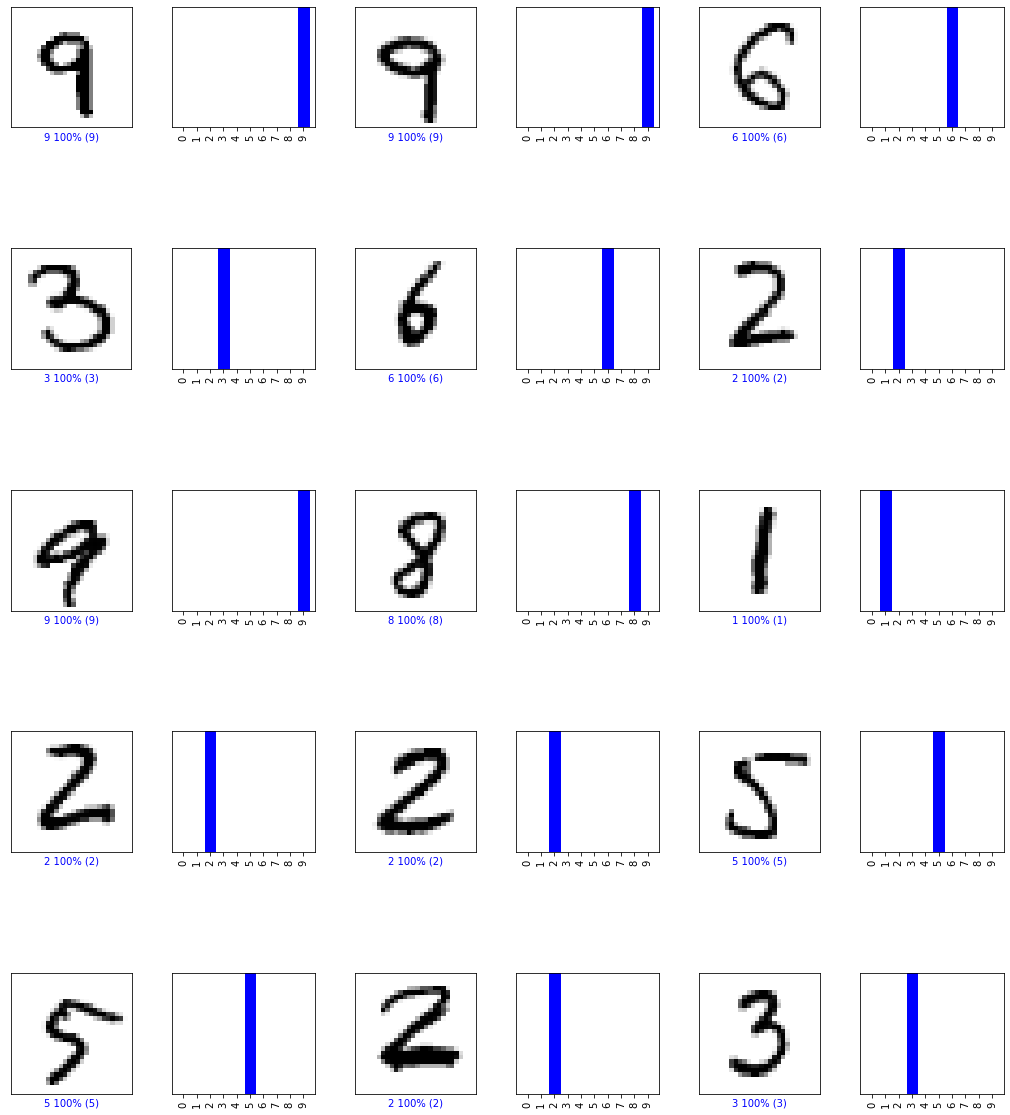

In [38]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


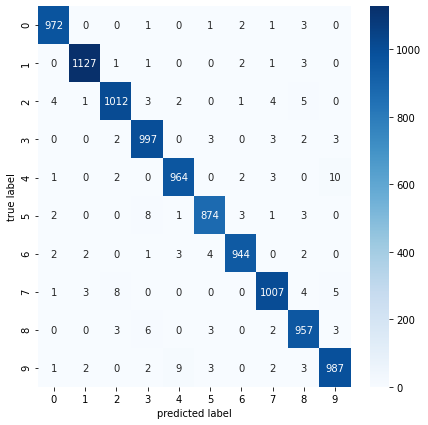

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 혼동 행렬을 만듭니다.
predictions = model.predict(test_images)
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(test_labels, axis = -1), np.argmax(predictions, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

## Find Your Best Model for MNIST